# Visualization
As usual, we start by visualizing our missing data. 

We started deadset on sticking to a pure Python workflow. If something not implemented in Python, we would rather code it ourselves than revert to R. That’s how we roll.

It became clear over time that R keeps a tremendous advantage in esoteric statistical fields such as handling missing data. At this point in time, no robust and comprehensive python package for handling missing data. A good lesson in data science – be versatile and use whatever is available.

I will show you here the workflow by appealing to the best R packages I could find for each task.

Visualization is key. Important not only for you, but also for your audience/publications.


### Interlude: Going back to R :)  
Is the missing data MCAR? (How to test for this)
[Baylor](https://cran.r-project.org/web/packages/BaylorEdPsych/BaylorEdPsych.pdf)
[MCAR Test Youtube](https://www.youtube.com/watch?v=LmyRcu75XEI)

If yes, great. If not, more manual investigations needed, as there is no statistical test to differentiate between MAR and MNAR. **YOU MEAN MCAR AND MNAR?**

Question: Should this part go here?


### VIM Package

The VIM package was initially developed for data imputation. Its unique strength is in missing data visualization, as well as in non parametric data imputation:

https://cran.r-project.org/web/packages/VIM/VIM.pdf

In [2]:
# Load VIM library for missing data visualization
library(VIM)

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



In [3]:
# Little's MCAR test, allows us to test if our data is MCAR or not
# unfortunately there is no test for whether the data is MAR or not, so distinguishing between MAR and MNAR is a 
# heuristic methodology, involving both the domain experts who collected the data, and the data analyst

#https://www.jstor.org/stable/2290157?seq=1#page_scan_tab_contents

# we will use the BaylorEdPsych package, which implements Little's MCAR test

#https://cran.r-project.org/web/packages/BaylorEdPsych/BaylorEdPsych.pdf

install.packages("BaylorEdPsych")
install.packages("mvnmle")

require("BaylorEdPsych")
require("mvnmle")

#LittleMCAR(dataset)
    
# unfortunately the popular R Studio software truncates your output. To see your entire output, you need to print 
# your console to an external file.

#sink("output.txt")
#print(LittleMCAR(dataset))
#sink()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: BaylorEdPsych
Loading required package: mvnmle


In [4]:
#Change to directory necessary 
# We tell R that missing values are coded by absence of any symbol (na.strong = ''), 
# and that the dataset has a header

# Load the data
data <- read.csv("data/horse.csv", na.strings = '', header=TRUE)
clinical_data <-read.csv("data/dummy_clinical.csv",na.strings='',header=TRUE)

data_knn_part <- kNN(data)

Warning message in kNN_work(as.data.table(data), variable, metric, k, dist_var, :
“Nothing to impute, because no NA are present (also after using makeNA)”

In [5]:
head(data_knn_part,2)

surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,⋯,packed_cell_volume_imp,total_protein_imp,abdomo_appearance_imp,abdomo_protein_imp,outcome_imp,surgical_lesion_imp,lesion_1_imp,lesion_2_imp,lesion_3_imp,cp_data_imp
no,adult,530101,38.5,66,28,cool,reduced,NA,more_3_sec,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
yes,adult,534817,39.2,88,20,NA,NA,pale_cyanotic,less_3_sec,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


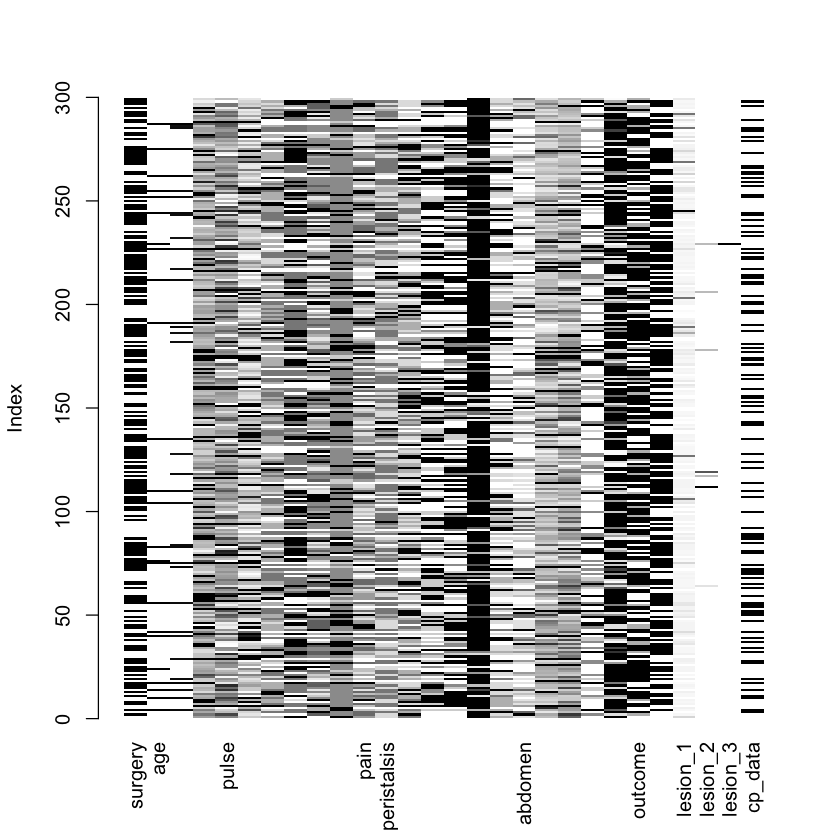

In [6]:
matrixplot(data, labels=TRUE)

This type of visualization gives us two things:

1. it ranks for us the variables in our dataset by proportion of missing observation (left part)
2. and especially it allows us to see patterns of joint missingness among variables (right part)


Warning message in plot.window(..., yaxs = "r"):
“"head" is not a graphical parameter”Warning message in plot.window(..., yaxs = if (is.null(dots$yaxs)) "i" else dots$yaxs):
“"head" is not a graphical parameter”Warning message in (function (side, at = NULL, labels = TRUE, tick = TRUE, line = NA, :
“"head" is not a graphical parameter”Warning message in axis(2, xpd = NA, ...):
“"head" is not a graphical parameter”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"head" is not a graphical parameter”

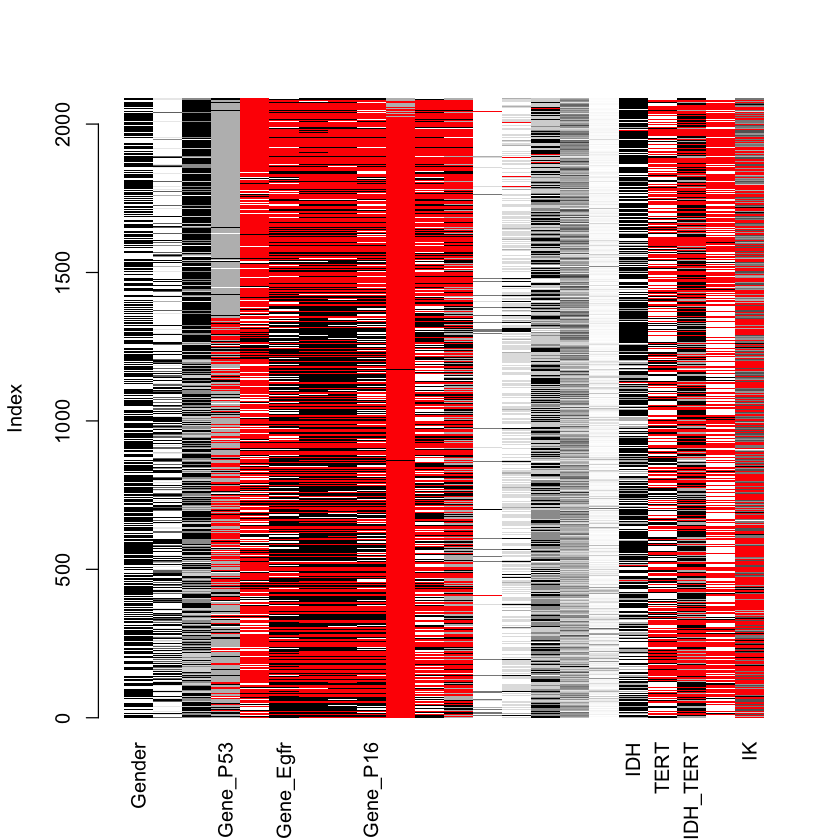

In [7]:
# blue refers to observed data and red to missing data
matrixplot(clinical_data,head=TRUE)

In [8]:
head(data,5)

surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,⋯,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
no,adult,530101,38.5,66,28,cool,reduced,NA,more_3_sec,⋯,45,8.4,NA,NA,died,no,11300,0,0,no
yes,adult,534817,39.2,88,20,NA,NA,pale_cyanotic,less_3_sec,⋯,50,85,cloudy,2,euthanized,no,2208,0,0,no
no,adult,530334,38.3,40,24,normal,normal,pale_pink,less_3_sec,⋯,33,6.7,NA,NA,lived,no,0,0,0,yes
yes,young,5290409,39.1,164,84,cold,normal,dark_cyanotic,more_3_sec,⋯,48,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
no,adult,530255,37.3,104,35,NA,NA,dark_cyanotic,more_3_sec,⋯,74,7.4,NA,NA,died,no,4300,0,0,no



 Variables sorted by number of missings: 
        Variable        Count
   Gene_Ihc_Atrx 0.9736337488
       Gene_Mgmt 0.7042186002
       Gene_Ch9P 0.5364333653
    X1p19q_codel 0.5354745925
       Gene_Cdk4 0.5167785235
              IK 0.5076701822
      Gene_Ch10Q 0.5047938639
       Gene_Mdm2 0.5028763183
        Gene_P16 0.5019175455
       Gene_Egfr 0.4760306807
        IDH_TERT 0.3969319271
            TERT 0.3859060403
        Gene_P53 0.2008628955
    Surgery_type 0.0110258869
  Tumor_Position 0.0091083413
             IDH 0.0043144775
  Tumor_Location 0.0009587728
          Gender 0.0000000000
      Tumor_type 0.0000000000
     Tumor_grade 0.0000000000
     Age_surgery 0.0000000000
 life_expectancy 0.0000000000


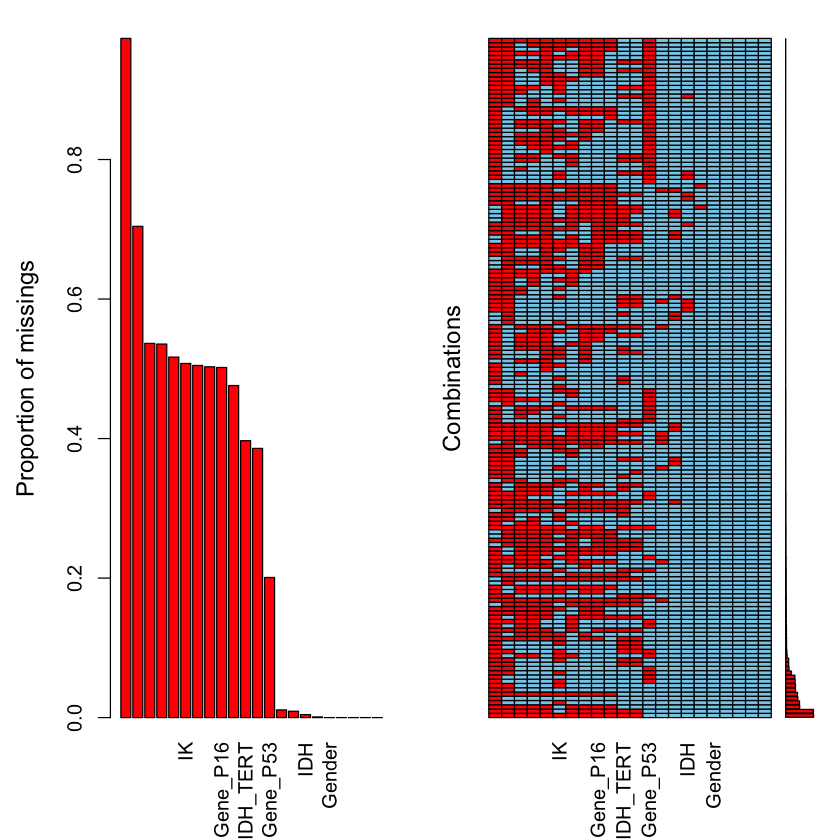

In [11]:
aggr(clinical_data, prop=c(TRUE,FALSE), sortVars=TRUE, sortCombs=TRUE)

This is a high level visualization of our observed vs missing observations across our dataset.
In red, we have missing values across our variables, and in black, observed values across our variables.
Here we look for the magnitude of missing data per variable, and for patterns to investigate further.

In [12]:
#let's quantify the number of missing values per variable
summary(clinical_data)

 Gender                              Tumor_type    Tumor_grade      Gene_P53   
 F: 805   GBM                             :1201   Min.   :1.000   ALTERE:  88  
 M:1281   astrocytome                     : 179   1st Qu.:3.000   NC    :1349  
          astrocytome gémistocytique (=A2):  14   Median :4.000   NORMAL: 230  
          astrocytome pilocytique         :  10   Mean   :3.375   NA's  : 419  
          gangliogliome                   :  14   3rd Qu.:4.000                
          gliome                          : 256   Max.   :4.000                
          oligo                           : 412                                
       Gene_Mgmt       Gene_Egfr      Gene_Mdm2       Gene_Cdk4   
 METHYLE    : 323   AMPLIFIE:278   AMPLIFIE:  49   AMPLIFIE:  68  
 NON METHYLE: 294   NORMAL  :815   NORMAL  : 988   NORMAL  : 940  
 NA's       :1469   NA's    :993   NA's    :1049   NA's    :1078  
                                                                  
                         

Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”

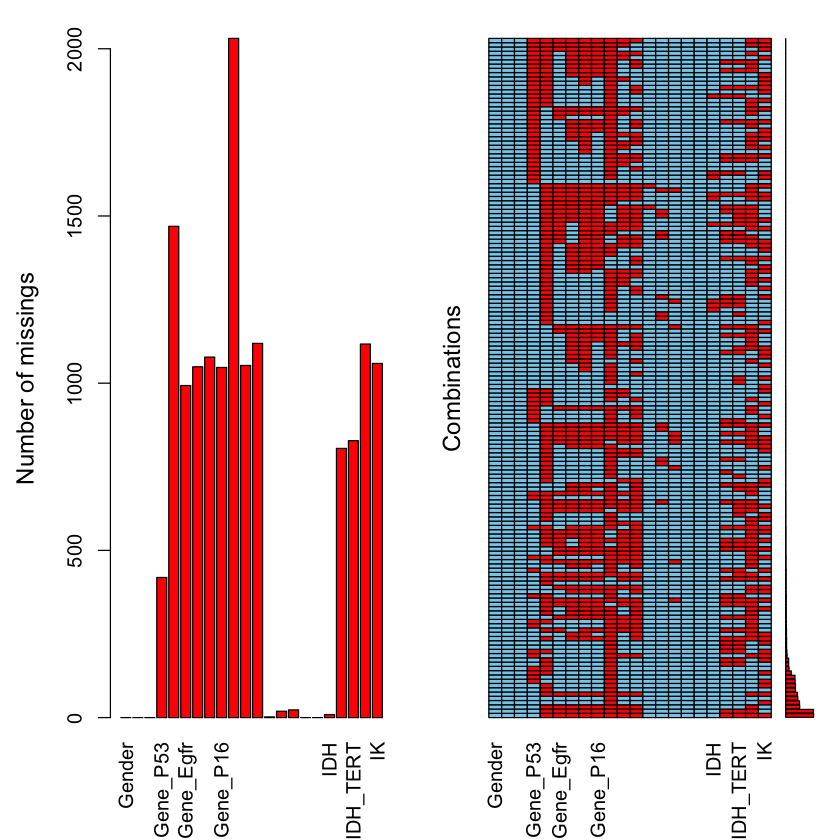

In [13]:
#now let's try a frequency plot of missing values per variable
aggr(clinical_data, prop = F, numbers = T)

#explain prop and numbers options

This type of visualization gives us two things:
1. it ranks for us the variables in our dataset by proportion of missing observation (left part)
2. and especially it allows us to see patterns of joint missingness among variables (right part)

*blue refers to observed data and red to missing data*

Let's say we want to narrow down on a pair of variables. A good idea is to test various variables with high proportion of missing data, against the response variable in your study.

Assuming two quantitative variables, you draw a margin plot. Like so:

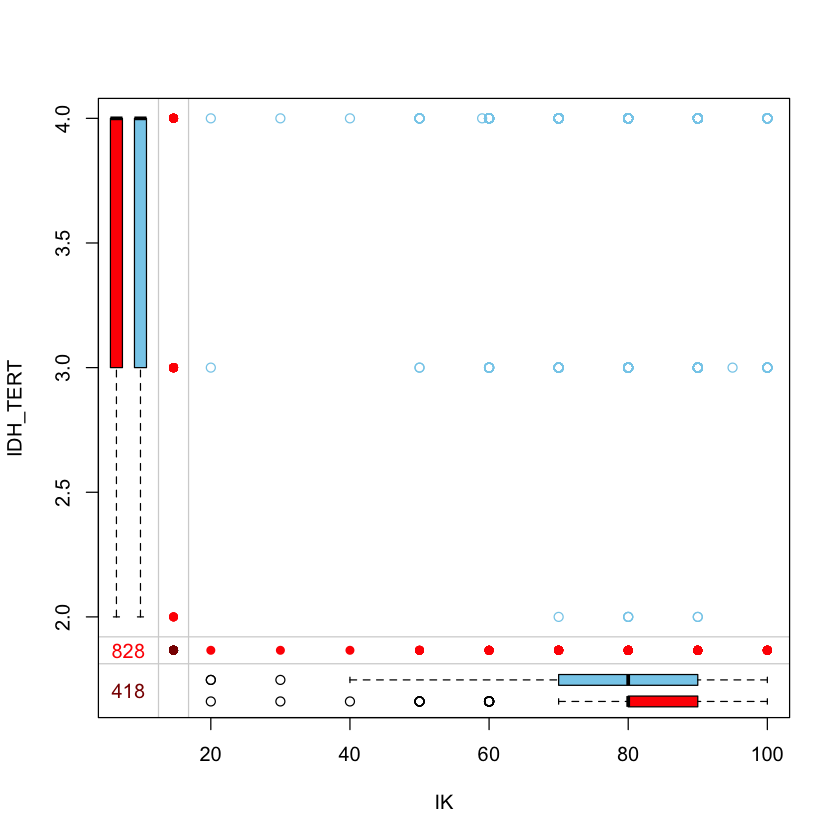

In [14]:
marginplot(clinical_data[,c("IK","IDH_TERT")])

blue box plot: distribution of values of a variable, given the other variable is observed
red box plot: distribution of values of a variable, given the other variable is missing
If your data is MCAR, you expect the blue and red box plots to be identical
This is rarely the case
If your data is MAR, we expect them to be similar, but not the same
In comparing the blue and red box plots, focus on the mean first, and the dispersion around the mean second

Assuming a quantitative and a categorical variable, you draw a box plot. Like so:

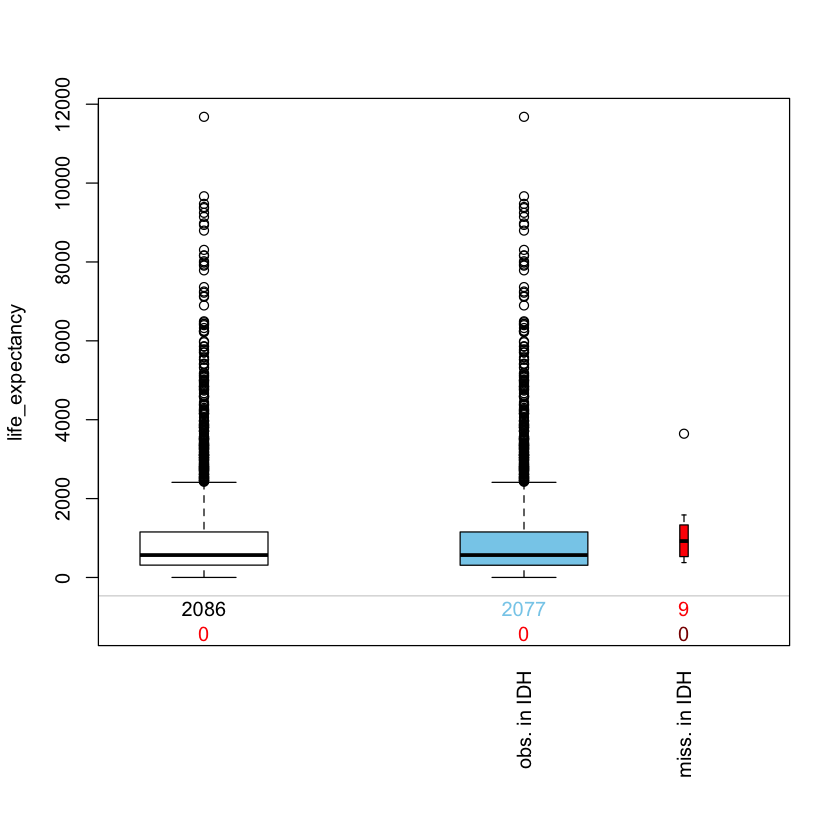

In [15]:
pbox(clinical_data[c("life_expectancy", "IDH")])

**TODO: Add correct data below**

In [16]:
vars <- c("Dream","NonD","Sleep","Dream_imp","NonD_imp","Sleep_imp")
pbox(sleep_kNN[,vars], delimiter="_imp", selection="none")

ERROR: Error in pbox(sleep_kNN[, vars], delimiter = "_imp", selection = "none"): object 'sleep_kNN' not found


In [15]:
#If interested, you can also use VIM for scatterplots as
 scattMiss(data[,c("bmi","chl")], inEllipse=TRUE, col=mdc(1:2),alpha=.8,bty="n",
 interactive=TRUE, axes=TRUE, lwd=c(1.5,1.5), pch=19, cex.lab=1.1, cex.axis=.9)
 # rugNA(nhanes[,c("bmi")], nhanes[,c("chl")], side=2, col=mdc(2), lwd=1.5)
 # rugNA(nhanes[,c("bmi")], nhanes[,c("chl")], side=1, col=mdc(2), lwd=1.5)

ERROR: Error in scattMiss(nhanes[, c("bmi", "chl")], inEllipse = TRUE, col = mdc(1:2), : object 'nhanes' not found


### Multiple imputation

To understand what drove the development of multiple imputation, we need to look at a common flaw of all imputation methods reviewed until here. They all lead us to analyze the final dataset as if it were a complete dataset. None of them takes into account the uncertainty present from the missing values in the original dataset. Such analyses invariably lead to overestimated test statistics and underestimated standard errors. All multiple imputation methods therefore have two goals, namely allowing the researcher to 1. arrive at unbiased estimates and 2. take into account the uncertainty stemming from the missing data present in the initial dataset.

Multiple imputation methods can be divided between **parametric** and **non-parametric** ones. 

Parametric methods require the specification of an underlying model. The two families of parametric multiple imputation methods, are maximum likelihood methods, and multiple imputation methods (somewhat confusingly called simply ‘multiple imputation’ since this is what all these methods, including the maximum likelihood ones, actually do). These methods make the assumption that the joint distribution of all variables in the data, including the response one, is multivariate normal. A multivariate normal distribution implies that any marginal, conditional distribution of a variable is a normal distribution conditional on all other variables in the model. This assumption stipulates that each variable in the dataset has a normal distribution, and that each variable can be represented as a linear function of the other variables with homoscedastic error terms. While datasets that match this assumption are rare in practice, Schafer (1997) showed that both ML and MI methods are relatively robust to violations of this assumption. This property is used for creating the estimations (Pigott, 2001).

However, within the multiple imputation family of methods, van Buuren developed multiple imputation by chained equations. One of the main attractiveness of this method is that indeed it does not assume that the joint distribution of variables in the dataset is multivariate normal. It is called a “fully conditional specification” (FCS) method, meaning that the imputation model is specified on a variable by variable basis. This is what makes it particularly attractive for large datasets with many different types of variables. Semiparametric?

Then, among non parametric methods, we find hot deck imputation and nearest neighbors techniques. These are methods for imputing the missing data without specifying any model for doing so.

As in all statistical learning, choosing between a parametric and a non parametric approach amounts to making decisions along the trade off between bias and variance. Parametric methods will usually display lower variance, at the expense of a higher bias. They can be brilliant if the model specified fits the target data very closely, and they can be extremely wrong when this is not the case. Non parametric methods will encounter lower bias, but higher variance.

**Parametric and semi parametric methods:**

Maximum likelihood
While EM methods have been shown to be very robust, the absence of standard error for estimates means that EM methods are not particularly suitable for hypothesis testing. However, Graham (2009) suggests possibly using them for preliminary analyses, which do not use standard errors in any case. 
A limitation of ML methods is that the theory and software were mostly developed around linear and logistic models for analyzing the dataset, and rarely extend to other models of analysis that researchers may intend to use (Allison, 2001).


Multiple Imputation
The MI algorithm:

Step 1: Impute all missing values in your dataset using an appropriate model. There are several robust models, what they all have in common is that they all incorporate a random variation in their estimates for the missing data. This is why they will reflect the uncertainty present in your original dataset, and this is why no two datasets will be the same after imputation, with regards to the originally missing values.
Step 2: Perform this imputation m times, hence generating m complete datasets, each slightly different. It is this variability that will adjust the standard errors upwards.
Step 3: Apply your analysis to each dataset.
Step 4: Pool the results from your m analyses together, therefore reaching one result as if you had dealt with one dataset the entire time. It is at this pooling step that you will incorporate the variability due to imputation. Indeed, the parameter estimate will simply be the mean of the parameter estimates of your m analyses. It is however at the standard error of your final parameter estimates that the magic happens – the latter will capture the estimation uncertainty due to the data originally missing. This pooling technique was developed by Rubin (1987) and is often referred to as “Rubin’s rules.”


Multiple imputation offers two distinct advantages over EM/ML methods: 

1. once the imputation is complete, researchers can use standard analyses as they would with any other complete dataset – much more flexible, and 
2. they can easily obtain the standard errors of estimates. 


**MICE**

Multivariate imputation by chained equations (MICE), also called fully conditional specification (FCS) is a semiparametric method for conducting multiple imputation. This technique has been pioneered, and implemented in R, by van Buuren in particular (1999, 2007, 2011).
The main difference between MICE and other multiple imputation techniques is the underlying model assumption. While both ML and MI methods operate under the multivariate normal assumption, MICE does not need to make what is often an unrealistic assumption in large datasets.

1. each variable can be modelled with its own distribution rather than as part of a joint model for the entire dataset
2. as a consequence of 1., MICE is a very versatile MI procedure, allowing us to model binary categorical variables with a logistic regression, multi level categorical variables with polyreg, and continuous variables with predictive mean matching for example. MICE allows us to easily handle in practice different types of variables.
3. as a further consequence of 1, MICE has been successfully applied to very large datasets with hundreds of variables (He et al 2009; Stuart et al 2009).

The MICE algorithm:

Step 1: A starting imputation is performed for every missing value in the dataset. This could be the mean for example.
Step 2: For one variable, the values imputed in Step 1 are reset to missing.
Step 3: A model is created that regresses the observed values of the variable chosen in Step 2, on the other variables in the dataset. 
Step 4: The model hence developed in Step 3 is used to predict/impute the missing values for our variable  (the same one as chosen in Step 2 and taken as the dependent variable of the regression model in Step 3).
Step 5: These steps are repeated for all variables with missing data until convergence (until the estimates vary very little from one iteration to the next).

For a more detailed description of MICE, please see van Buuren (1999, 2011) as well as Azur et al (2011).
Let's see some R visualizations and code for multiple imputation

What other ways of exploring/describing missing data do we have?

1. Counts by reason of missingness
2. Kaplan-Meier plot by treatment group of the probability of remaining in the study over time
3. Plot of mean outcome over time by selected categories of discontinuation i.e. subjects discontinuing showing a worse outcome at that point than completers
4. Spaghetti plots – plots of outcome over time with one line per subject (randomly selected or completers vs drop outs…)
5. Logistic regression with missingness at end of study as the dependent variable. Investigating variables that may explain the missingness and how they are related to it.

For the N.E.R.D.S:

Whaaaaat?

In linear regression we know that a regression can be estimated using only either the sample means and covariance matrix, or the means, standard deviations and correlation matrix (see any introductory statistical book such as Introduction to Statistical Learning). Pairwise deletion aims to take advantage of this insight, computing these statistics using all the cases for which data is available, across our dataset.

Overall, same problems as with complete case analysis.
Exception: works under MCAR but analysis needs modifications.

A large and esoteric debate among missing data statisticians as to which of the two is better under which scenarios. Recommend to avoid this debate alltogether.

If what I've done my whole life was wrong, what can I do now to atone for my sins?
Impute baby, impute.

What is imputation?
Imputation amounts to filling in missing values with appropriate estimates for them, and then using standard complete data methods to study the now complete dataset. “From an operational standpoint, imputation solves the missing-data problem at the outset, enabling the analyst to proceed without further hindrance.” (Schafer, 1999)

It is important to understand from the beginning the objective of imputation. It is not to estimate as accurately as possible any single missing value. The objective is to create a complete dataset that preserves as much as possible the characteristics of the original complete dataset. Intuitively this makes sense because in applied statistics, we aim to infer parameters about a population, based on the estimates computed from our sample. As such we are interested in statistics about aggregates, rather than in the exact value of single observations. As Little and Rubin (2002) state “It is important to note at the outset that usually sample surveys are conducted with the goal of making inferences about population quantities such as means, correlations and regression coefficients, and the values of individual cases in the data set are not the main interest. Thus, the objective of imputation is not to get the best possible predictions of the missing values, but to replace them by plausible values in order to exploit the information in the recorded variables in the incomplete cases for inference about population parameters.” 

Cautionary note: many methods to impute missing data. You need to be careful to both use one of the statistically robust methods, and to use a software package that implements it correctly. The theory is very difficult to grasp and there are many permutations possible in implementing it.

Insight: you are obviously not changing the mean/mode by using this technique.
BUT
Variances and covariances will be severely underestimated (Haitovsky, 1968), for two reasons: First, filling in all missing values with the mean will not account for the variation that would most likely be present in reality between those observed values. You are imputing the mean for every missing value, while the real values would probably vary around the mean value. Second, your ultimately increased sample size will result in smaller standard errors, and these will not accurately reflect the uncertainty actually existing in your dataset due to those missing values. 

In studying single imputation methods, Pigott (2001) concludes that “under no circumstances does mean imputation produce unbiased results…Bias in the estimation of variances and standard errors are compounded when estimating multivariate parameters such as regression coefficients.”

What about longitudinal studies and the common practice of LOCF and BOCF?

They are simply specific cases of single imputation. 

Multiple imputation

To understand what drove the development of multiple imputation, we need to look at a common flaw of all imputation methods reviewed until here. 
They all lead us to analyze the final dataset as if it were a complete dataset. 
None of them takes into account the uncertainty present from the missing values in the original dataset. 
Such analyses invariably lead to overestimated test statistics and underestimated standard errors. 

All multiple imputation methods therefore have two goals, namely allowing the researcher to 
1. arrive at unbiased estimates, and 
2. take into account the uncertainty stemming from the missing data present in the initial dataset.

Multiple imputation methods can be divided between parametric and non parametric ones. 

parametric: assume data follows an underlying model/distribution. Typically this would be that the data follows a multivariate normal distribution for example.
Maximum likelihood, Multiple imputation

semi-parametric: relax the assumptions that the data follows an underlying model/distribution
Multiple imputation by chained equations MICE (also called fully conditional specification or FCS)

non parametric: no assumption about the data is made
KNN imputation, hot deck imputation

Maximum likelihood

The EM algorithm
The EM algorithm consists of two steps, repeated iteratively until convergence to the ML estimates:

1. the expectation step
This step is in practice a regression step, where we apply listwise deletion or pairwise deletion to the dataset, and then regress the missing data points for each variable on all the other variables.
The algorithm assigns starting values for the unknown parameters: these will be the sample means and covariance. They will be obtain through standard regression means, after applying either of listwise deletion or pairwise deletion.
With these starting parameters, it will calculate the coefficients of the regression of the missing values for one variable on all the other variables.
Using these regression coefficients, it will then impute the missing values for that variable.
This will be done for each variable with missing data.

2. After the expectation step is completed, the maximization step will calculate new parameters, means and covariances, using both the imputed data and the nonmissing data.

The algorithm then performs again the expectation step, calculating new parameter estimates, regression coefficients, and imputed data.

The expectation and maximization steps are repeated until the algorithm converges, which we know because at convergence the estimates will change very little from one iteration to the next.

Problems: this method does not output standard error estimates. Mostly suitable for linear regression and linear modelling, for which adaptations and examples of handling missing data through ML have been developed.

Multiple imputation

The MI algorithm:

Step 1: Impute all missing values in your dataset using an appropriate model. There are several robust models, what they all have in common is that they all incorporate a random variation in their estimates for the missing data. This is why they will reflect the uncertainty present in your original dataset, and this is why no two datasets will be the same after imputation, with regards to the originally missing values.
Step 2: Perform this imputation m times, hence generating m complete datasets, each slightly different. It is this variability that will adjust the standard errors upwards.
Step 3: Apply your analysis to each dataset.
Step 4: Pool the results from your m analyses together, therefore reaching one result as if you had dealt with one dataset the entire time. It is at this pooling step that you will incorporate the variability due to imputation. Indeed, the parameter estimate will simply be the mean of the parameter estimates of your m analyses. It is however at the standard error of your final parameter estimates that the magic happens – the latter will capture the estimation uncertainty due to the data originally missing. This pooling technique was developed by Rubin (1987) and is often referred to as “Rubin’s rules.”

Multiple imputation by chained equations

The main difference between MICE and other multiple imputation techniques is the underlying model assumption. While both ML and MI methods operate under the multivariate normal assumption, MICE does not need to make what is often an unrealistic assumption in large datasets. In MICE, each variable with missing data is modelled as a conditional model that depends on all the other variables in the data. There are three main advantages to this technique:

1. each variable can be modelled with its own distribution rather than as part of a joint model for the entire dataset
2. as a consequence of 1., MICE is a very versatile MI procedure, allowing us to model binary categorical variables with a logistic regression, multi level categorical variables with polyreg, and continuous variables with predictive mean matching for example. MICE allows us to easily handle in practice different types of variables.
3. as a further consequence of 1, MICE has been successfully applied to very large datasets with hundreds of variables (He et al 2009; Stuart et al 2009).

The MICE algorithm:

Step 1: A starting imputation is performed for every missing value in the dataset. This could be the mean for example.
Step 2: For one variable, the values imputed in Step 1 are reset to missing.
Step 3: A model is created that regresses the observed values of the variable chosen in Step 2, on the other variables in the dataset. 
Step 4: The model hence developed in Step 3 is used to predict/impute the missing values for our variable  (the same one as chosen in Step 2 and taken as the dependent variable of the regression model in Step 3).
Step 5: These steps are repeated for all variables with missing data until convergence (until the estimates vary very little from one iteration to the next).

For a more detailed description of MICE, please see van Buuren (1999, 2011) as well as Azur et al (2011).

We only work with MICE in practice.

Back to the kitchen

In [44]:
# Install MICE package
install.packages('mice')

also installing the dependencies ‘ucminf’, ‘ordinal’, ‘pan’, ‘jomo’, ‘mitml’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [48]:
require(mice)

Loading required package: mice
Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



The two golden rules to avoid premature ageing:

1. Always code your categorical variables as such for R. You need to tell it explicitly, where categorical variables are coded as numbers, that they are categorical. Otherwise it will treat them as continuous, and mess with your imputation model.
2. Remove any variables that have all missing values from your dataset before the imputation. It is not possible to impute variables where all data is missing. Duh!

In [46]:
# code IDH_TERT and X1p19q_codel as factors so that R/MICE doesnt treat them as continuous
# to tell R a variable is categorical, you code it as a factor

data$IDHTERT<- as.factor(data$IDH_TERT)
data$Tumorgrade <- as.factor(data$Tumor_grade)
data$X1p19qcodel<- as.factor(data$X1p19q_codel)

In [49]:
# run mice imputation with 20 iterations
# the number of iterations you want is something you assess subjectively. I tend to go with 20, and so can you.
# here we create a new dataset, imp, which is an imputed version of our "dataset" with missing values, 
# and we tell mice to run with 20 iterations (maxit = 20)

imp <- mice(data, maxit = 20)


 iter imp variable
  1   1  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ihc_Atrx  Gene_Ch10Q  Gene_Ch9P  Tumor_Location  Tumor_Position  Surgery_type  IDH  TERT  IDH_TERT  X1p19q_codel  IK
  1   2  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ihc_Atrx  Gene_Ch10Q  Gene_Ch9P  Tumor_Location  Tumor_Position  Surgery_type  IDH  TERT  IDH_TERT  X1p19q_codel  IK
  1   3  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ihc_Atrx  Gene_Ch10Q  Gene_Ch9P  Tumor_Location  Tumor_Position  Surgery_type  IDH  TERT  IDH_TERT  X1p19q_codel  IK
  1   4  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ihc_Atrx  Gene_Ch10Q  Gene_Ch9P  Tumor_Location  Tumor_Position  Surgery_type  IDH  TERT  IDH_TERT  X1p19q_codel  IK
  1   5  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ihc_Atrx  Gene_Ch10Q  Gene_Ch9P  Tumor_Location  Tumor_Position  Surgery_type  IDH  TERT  IDH_TERT  X1p19q_codel  IK
  2  

Warning message:
“Number of logged events: 454”

In [ ]:
# always inspect the methods that mice used to impute each variable, to make sure it imputed the different types of
# variables following an appropriate methodology
# standard procedure is to impute continuous variables with pmm model, categorical binary with logreg model, and 
# categorical beyond binary with polyreg model
imp$method

In [ ]:
# we see that mice imputed each variable with a model suitable for its type

In [ ]:
# we now need to inspect convergence
# for this, we plot one (or more) parameters, against the iteration

plot(imp)

Convergence means that the variance between different imputation sequences is no larger than the variance within each individual sequence.
What you want to see if imputations streams that are freely intermingled with each other, without showing any trends.

In [ ]:
#add picture of non convergence

Once we assessed convergence, it is important to check the imputations.
A "good" imputed value is one that could have been observed, had it not been missing (van Buuren, 2011)

For this, we use two graphs offered by the mice package:

1. the kernel density plot, and
2. a scatterplot

both showing the distribution of observed values, versus that of imputed values.

In practice, differences between the observed and imputed values at this level are common. As such, these graphs tend to serve as a guide to the differences that arise in practice between observed and imputed values, as an additional piece of information for investigators. These differences often have their roots in the characteristics of the dataset and those of observed versus missing data (i.e. head circumference measurements were missing for all children under 2 years old in the study, as they had not been measured to begin with. In such a case you will obviously have differences between the distribution of observed values - head circumference of children older than 2 - and imputed values - head circumference of children younger than 2, which was all missing -).

In [ ]:
densityplot(imp.kendall, scales = list(x = list(relation = "free")),
+    layout = c(5, 1))

In [ ]:
## scatterplot (of chl and bmi) for each imputed dataset
xyplot(imp, bmi ~ chl | .imp, pch = 20, cex = 1.4)
 

In [ ]:
stripplot(imp, pch = 20, cex = 1.2)

In [ ]:
# we now obviously need to export the imputed dataset, for further use in our analysis
write.csv(complete(imp), file = "imputed_dataset_no_censoring_16022018")

**Amelia Multiple Imputation**

In [ ]:


# set directory
setwd(Dropbox/Healthcare work Patric)

# load dataset
dataset = read.csv("imputation_dataset_no_censoring_24022018", header = TRUE, na.strings = '')

# load Amelia package
library(Amelia)

# In Amelia coding:
noms = categorical variables
ords = ordinal variables
idvars = nominal variables that should not be imputed

# if running Amelia on full dataset, it will throw an error. you need to remove either Tumor_type of Tumor_grade since 
# removing Tumor_type converges faster, I removed Tumor_grade by adding it to idvars option Since both Tumor_type and 
# Tumor_grade variables have no missing data, this does not hinder us at all

a.out <- amelia(dataset, m=1, noms = c("Gender", "Tumor_grade", "Gene_P53", "Gene_Mgmt", "Gene_Egfr", "Gene_Mdm2", "Gene_Cdk4", "Gene_P16", "Gene_Ihc_Atrx", "Gene_Ch10Q", "Gene_Ch9P", "Tumor_Location", "Tumor_Position", "Surgery_type", "IDH", "TERT", "X1p19q_codel"), ords = c("IDH_TERT"), idvars = c("RX", "CHEM", "Tumor_type"))

#get key messages post imputation, including the expected "Normal EM convergence"

a.out

# get full summary of output dataset
summary(a.out)

# Post imputation diagnostic graphs
plot(a.out, which.vars = 4:15)
overimpute(a.out, var = "IDH_TERT")
overimpute(a.out, var = "IK")

# export dataset. Here a.out contains only one imputed dataset. If it contained 5, this would export each of them 
# in a csv named file.stem+1, file.stem+2...

write.amelia(obj=a.out, file.stem = "imputed_dataset_no_censoring_24022018_Amelia")

**KNN Imputation**

In [ ]:


# code categorical variables as such
dataset <- read.csv("imputation_dataset_no_censoring_24022018", header=TRUE, na.strings = "")
dataset$IDHTERT<−as.factor(dataset$IDH_TERT)
dataset$X1p19qcodel<−as.factor(dataset$X1p19q_codel)

# impute with KNN method, and using a k=10 parameter
imp <- kNN(dataset, k = 10)

# export imputed dataset
write.csv(imp, "imputed_dataset_with_censoring_16.02.2018_kNN.csv")